# Reading Data

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('./movie_metadata.csv')

In [7]:
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [8]:
numeric_feature_list = list(set(df._get_numeric_data().columns) - 
                            set(['imdb_score', 'title_year', 'aspect_ratio', 'facenumber_in_poster']))
print(numeric_feature_list)

for i in numeric_feature_list:
    df[i + '_log'] = np.log(df[i] + 1)
    
log_numeric_feature_list = [i + '_log' for i in numeric_feature_list]

['actor_2_facebook_likes', 'num_voted_users', 'director_facebook_likes', 'duration', 'num_critic_for_reviews', 'budget', 'gross', 'cast_total_facebook_likes', 'movie_facebook_likes', 'actor_1_facebook_likes', 'actor_3_facebook_likes', 'num_user_for_reviews']


In [9]:
# pd.plotting.scatter_matrix(df[log_numeric_feature_list], figsize=(50,50))

# Kmeans

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [32]:
from sklearn.cluster import KMeans

# X is a table with 2 columns(features)
feature_list = ['movie_facebook_likes_log', 'num_voted_users_log']
X = df[feature_list].dropna().values

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

print(set(kmeans.labels_))

from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, kmeans.labels_)

{0, 1}


/Users/zhicongchen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


0.5210741797682689

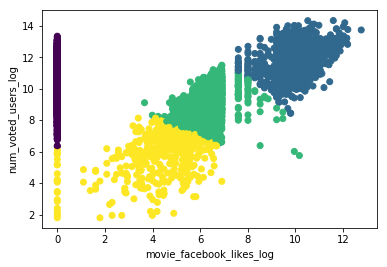

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.xlabel(feature_list[0])
plt.ylabel(feature_list[1])
plt.show()

In [13]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, kmeans.labels_)

/Users/zhicongchen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


0.5807985991918672

# DBSCAN

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [14]:
from sklearn.cluster import DBSCAN
import numpy as np

X = df[feature_list].dropna().values

clustering = DBSCAN().fit(X)

print(sorted(set(clustering.labels_)))

[-1, 0, 1, 2, 3, 4, 5]


Text(0,0.5,'num_voted_users_log')

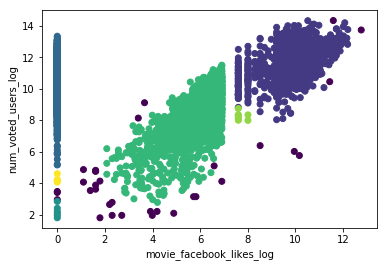

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_)
plt.xlabel(feature_list[0])
plt.ylabel(feature_list[1])

In [16]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, clustering.labels_)

/Users/zhicongchen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


1.0236706481289486